# Predicting the functionality of water points in Tanzania using machine learning
## Data cleaning and exploration

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [2]:
#importing data
train = pd.read_csv('Training set.csv')
test = pd.read_csv('Test set.csv')
training_labels = pd.read_csv('Training set labels.csv')

In [3]:
train.shape

(59400, 40)

In [4]:
test.shape

(14850, 40)

In [5]:
training_labels.shape

(59400, 2)

In [6]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011/03/14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013/03/06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013/02/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013/01/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011/07/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013/02/04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013/02/04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013/02/01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013/01/22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013/03/27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [9]:
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
train.set_index('id',inplace=True) # setting id as an index to train set
training_labels.set_index('id',inplace=True) # setting id as an index to train labels
df = pd.merge(training_labels, train, how = 'inner', left_index = True,right_index=True) #merging two data sets
df.reset_index(inplace=True) # setting a new index 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [12]:
df.isna().sum().sort_values(ascending=False) # to see the null values

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
source                       0
management                   0
waterpoint_type              0
source_class                 0
extraction_type              0
source_type                  0
extraction_type_group        0
extraction_type_class        0
management_group             0
quantity_group               0
payment                      0
payment_type                 0
construction_year            0
water_quality                0
quality_group                0
quantity                     0
id                           0
recorded_by                  0
status_group                 0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin   

Text(0, 0.5, 'Number of water points')

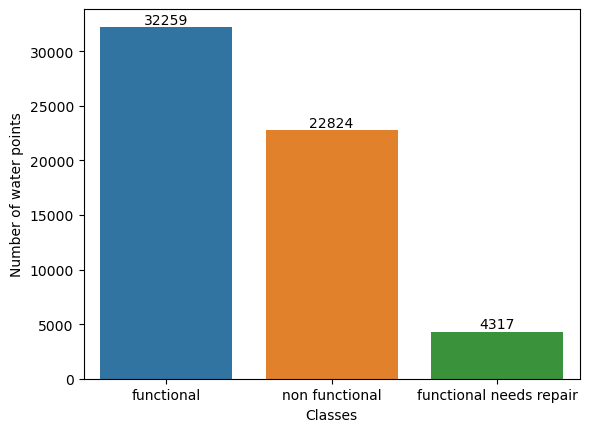

In [13]:
ax = sns.countplot(x='status_group', data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Classes")
plt.ylabel("Number of water points")

## Checking the distribution of target variable in the training data

In [14]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

We have highly imbalanced target values. Also, there are some null values and some columns which contain same information in the data set. Now, we will drop them because the same values or dublicated values do not affect our target, and when we simplify our data we can run our models easier.

## scheme_management / management / management_group columns

In [15]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [16]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

These two columns has nearly same information. Because scheme_management represents who operates the water point, 'management' represents how the water point is managed. There are 3877 null values in 'scheme_management' column so we prefer 'management' column to keep. The column 'management_group' is also keep similar information that how the water point is managed.

In [17]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [18]:
df.loc[df['management_group']=='user-group']['management'].value_counts() # to find sub-groups of this column

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

To find the subgroups of 'management_group' column, we checked the 'user-group' values and saw that this column is just the grouped version of 'management'. Although 'management' has more detailed values, we decided to drop 'management_group' column. Also, to remember and check the sub-groups of the 'management_group' column, we grouped it below and saw the numbers of sub-groups (management column).

In [19]:
df.groupby(['management_group','management']).count() 
# to see how many sub-groups have in management group according to management column

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   ...  payment_type  water_quality  \
management_group management        ...                                
commercial       company           ...           685            685   
                 private operator  ...          1971           1971   
                 trust             ...            78             78   
                 water authority   ...           904            904   
other            other             ...           844            844   
                 other - school    ...            99             99   
parastatal       parastatal        ...          1768           1768   
unknown          unknown           ...           561            561   
user-group       vwc               ...         40507          40507   
                 water board       ...          2933           2933   
                 wua               ...          2535           2535   
                 w

## quantity / quantity_group columns

In [20]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [21]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

Text(0, 0.5, 'Number of water points')

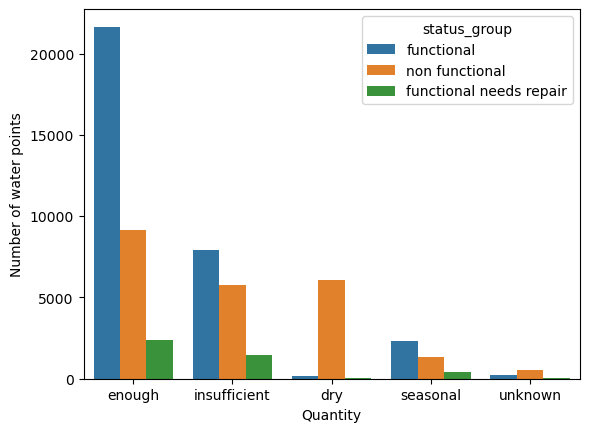

In [24]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)
plt.xlabel("Quantity")
plt.ylabel("Number of water points")

## source / source_type / source_class columns

In [25]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [26]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [27]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [28]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10252       11075   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11075   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   ...  management_group  payment  \
source_class source                ...                              
groundwater  hand dtw              ...               874      874   
             machine dbh           ...             11075    11075   
             shallow well          ...             16824    16824   
             spring                ...             17021    17021   
surface      dam                   ...               656      656   
             lake                  ...               765      765   
             rainwater harvesting  ...              2295     2295   
             river                 ...              9612     9612   
unknown      other                 ...               212      212   
             unknown               ...                66       66   

                                   payment_type  water_quality  quality_group  \
source_class source                                                             
groundwater  hand dtw                       874            874            874   
             machine dbh                  11075          11075          11075   
             shallow well                 16824          16824          16824   
             spring                       17021          17021          17021   
surface      dam                            656            656      

It is obvious that these three columns keep same information. so, we decided to keep just 'source' column, because it has more detailed information and we will drop others.

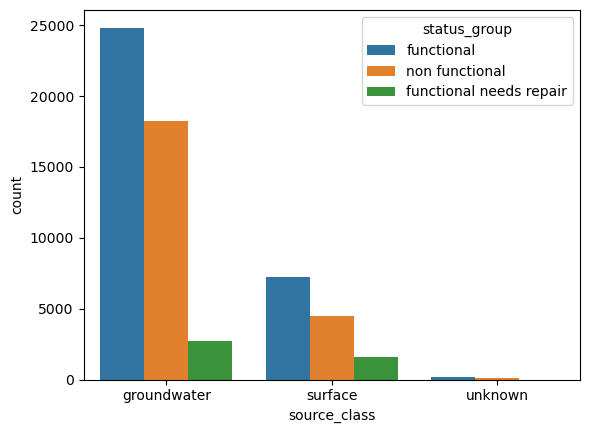

In [29]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

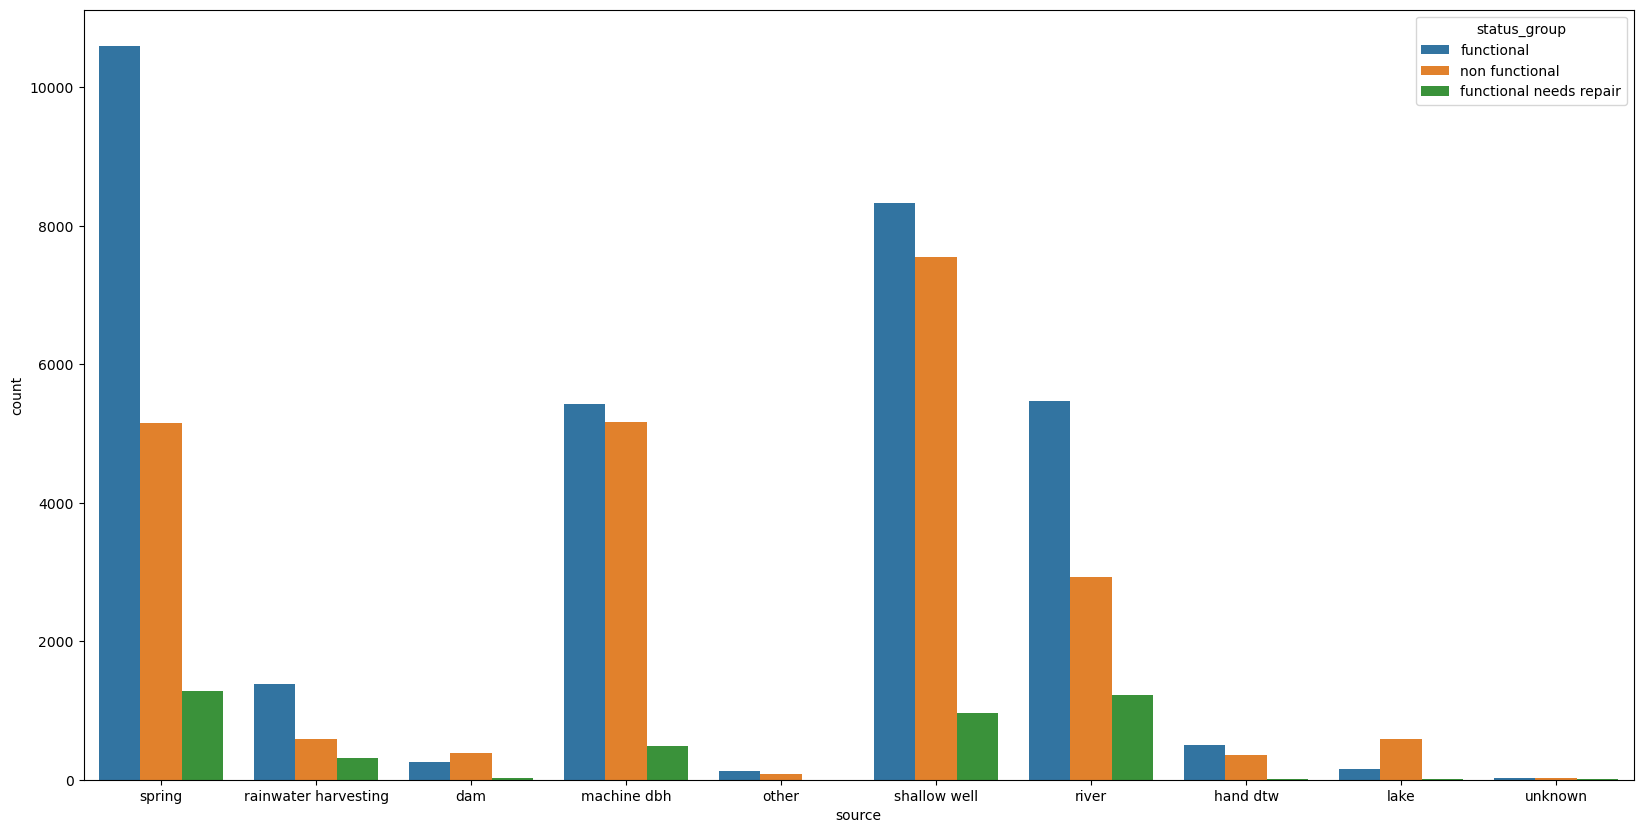

In [30]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

## water_quality / quality_group columns

In [31]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [32]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'.

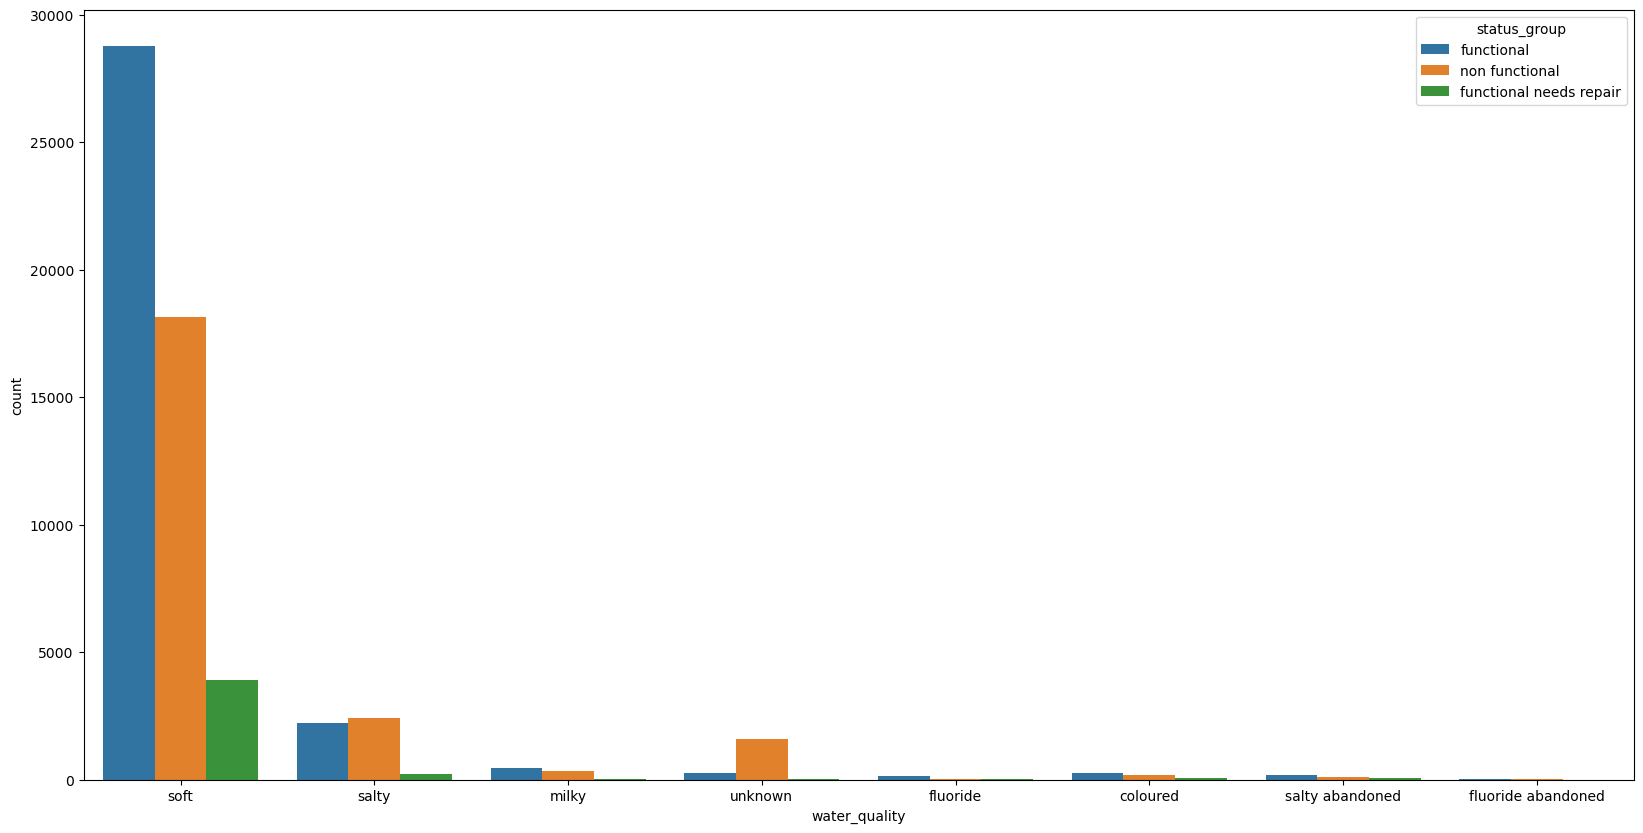

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)


Text(0, 0.5, 'Number of water points')

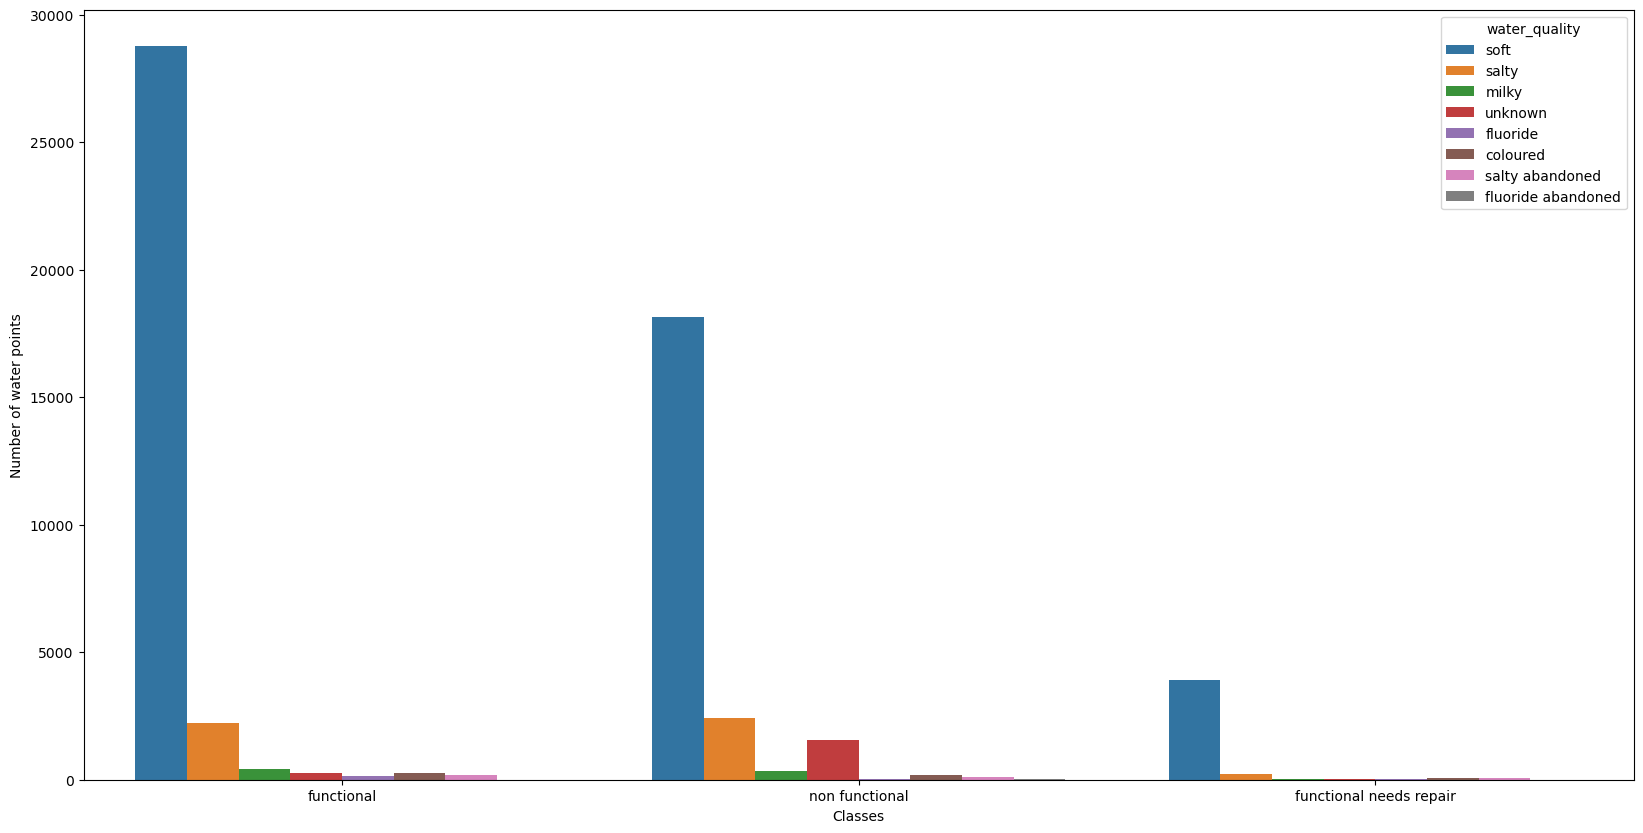

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)
plt.xlabel("Classes")
plt.ylabel("Number of water points")

From the graphs, it is seen that lots of non-functional water points have soft, good water quality.

## payment / payment_type columns

In [37]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [38]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

These two columns are same so we decided to drop one of them.

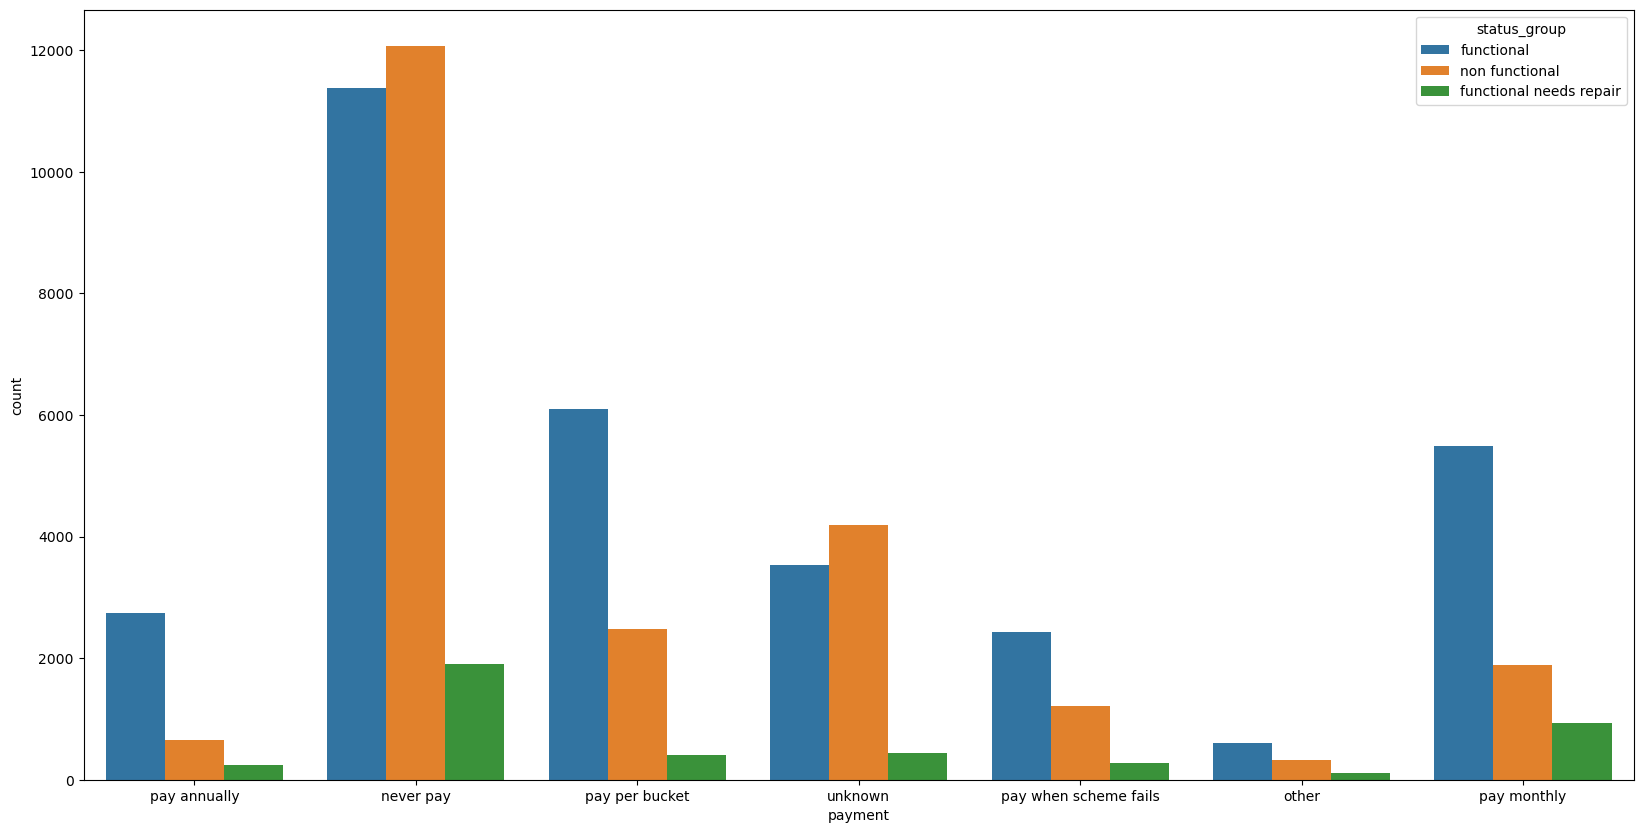

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

This feature shows us what the water cost. Mostly, there are lots of non-functioal water points as never paid for them

## extraction_type / extraction_type_group / extraction_type_class columns

In [41]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [42]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [43]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [44]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  ...  \
extraction_type_class extraction_type_group                      ...   
gravity               gravity                   26780     26780  ...   
handpump              afridev                    1770      1770  ...   
                      india mark ii              2400      2400  ...   
                      india mark iii               98        98  ...   
                      nira/tanira                8154      8154  ...   
                      other handpump              364       364  ...   
    

It is obviously seen that these three columns keep same information. So, we decided to keep 'extraction_type_group' and drop others. Although, extraction_type has more unique values than extraction_type_group , some of these values are very small amount according to this big dataset. We prefered to use more compact one. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep.

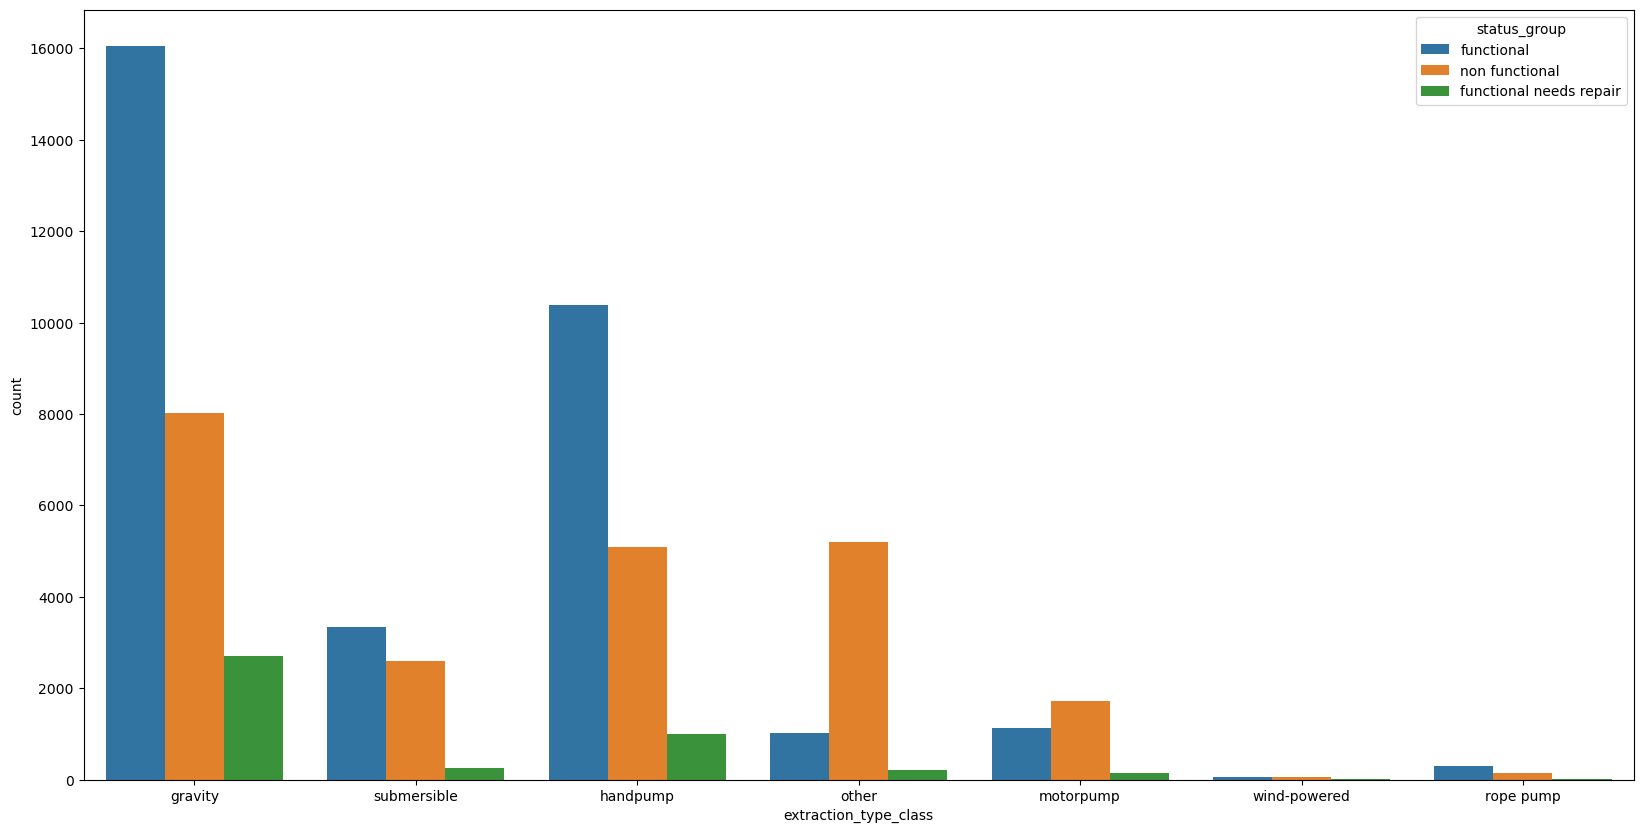

In [45]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

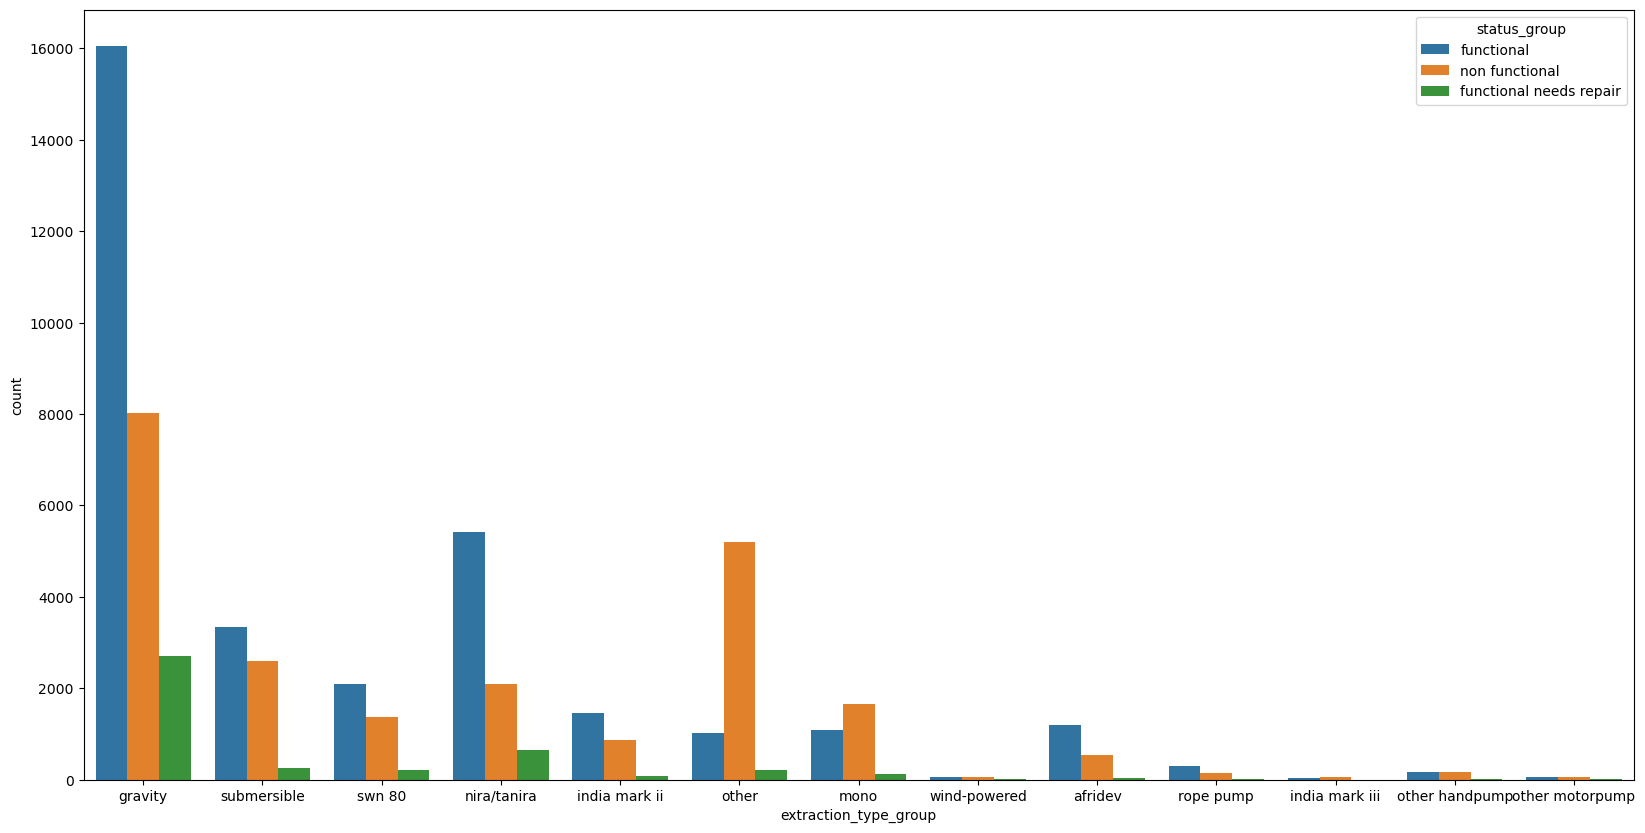

In [46]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

waterpoint_type / waterpoint_type_group

In [47]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [48]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We decided to keep 'waterpoint_type' which contains more detail.

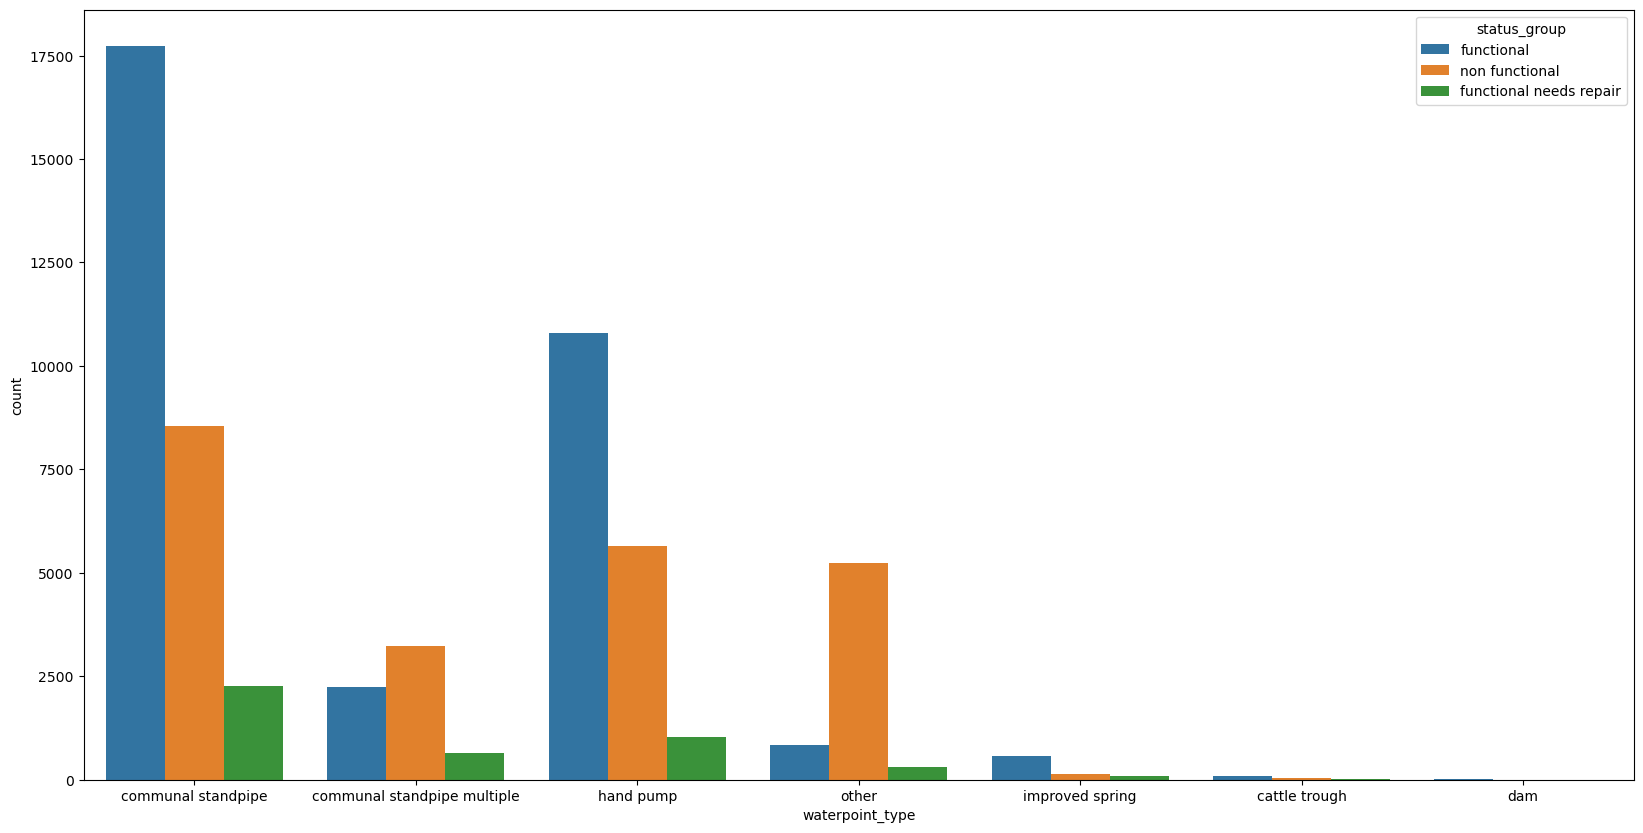

In [49]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

## Dropping Similar Columns

In [50]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

## construction_year column

In [51]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

New feature is added to the dataset. The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades.

In [52]:
df['decade'] = df['construction_year'] #creating new columns

In [53]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [54]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [55]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [56]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

In [57]:
df['construction_year'].value_counts()

2000    22800
2010     2645
2008     2613
2009     2533
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

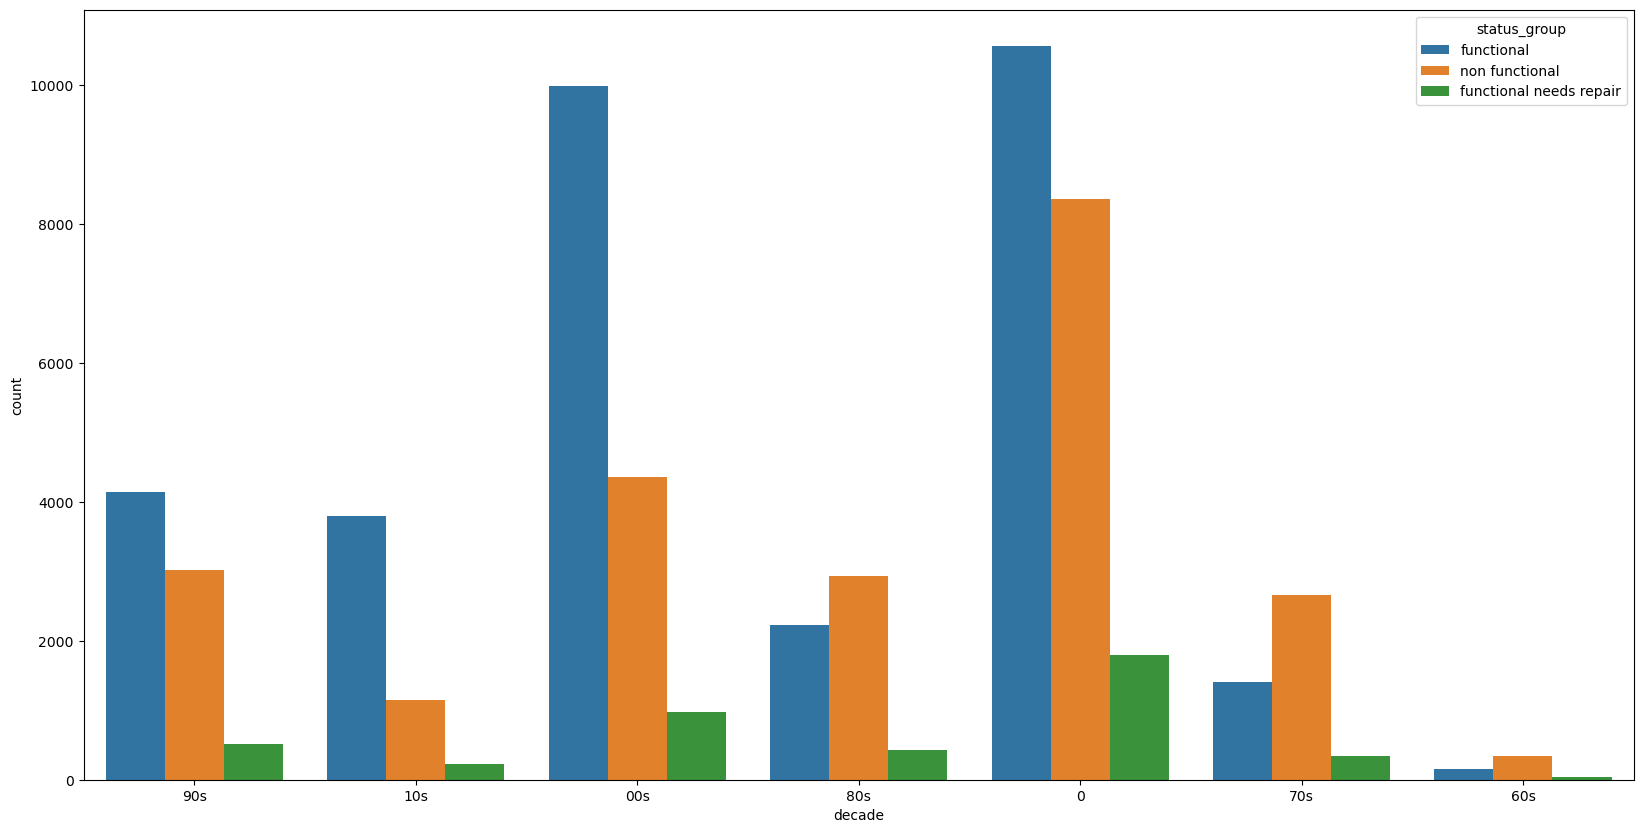

In [58]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

It is obviously seen that missing values and most recent years have more functional water points.

## recorded_by column

In [60]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

The recorded_by column has one value. This will not give any information to our model. So, we dropped it also.

In [61]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

## installer column

There are lots of NaN and 0 values in this column. Firstly, we will convert them to unknown.

In [62]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [63]:
df['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [64]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [65]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [66]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [67]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

We checked the first 100 value counts of installer column. Because we realized some installer names are written with mistake and given as different like 'District Council' and 'District council'. So, we will change the values which we realied. The first 100 value counts contains 47237 values. It means 79.5% of data is checked.

Now we want to see most common 20 values and visualize them to see the functionality. For this plot, we will not take the values which are smaller than 400. Because this amount does not have majority in this data and it is not good to see thousands of values in same graph.

In [69]:
df['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [70]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

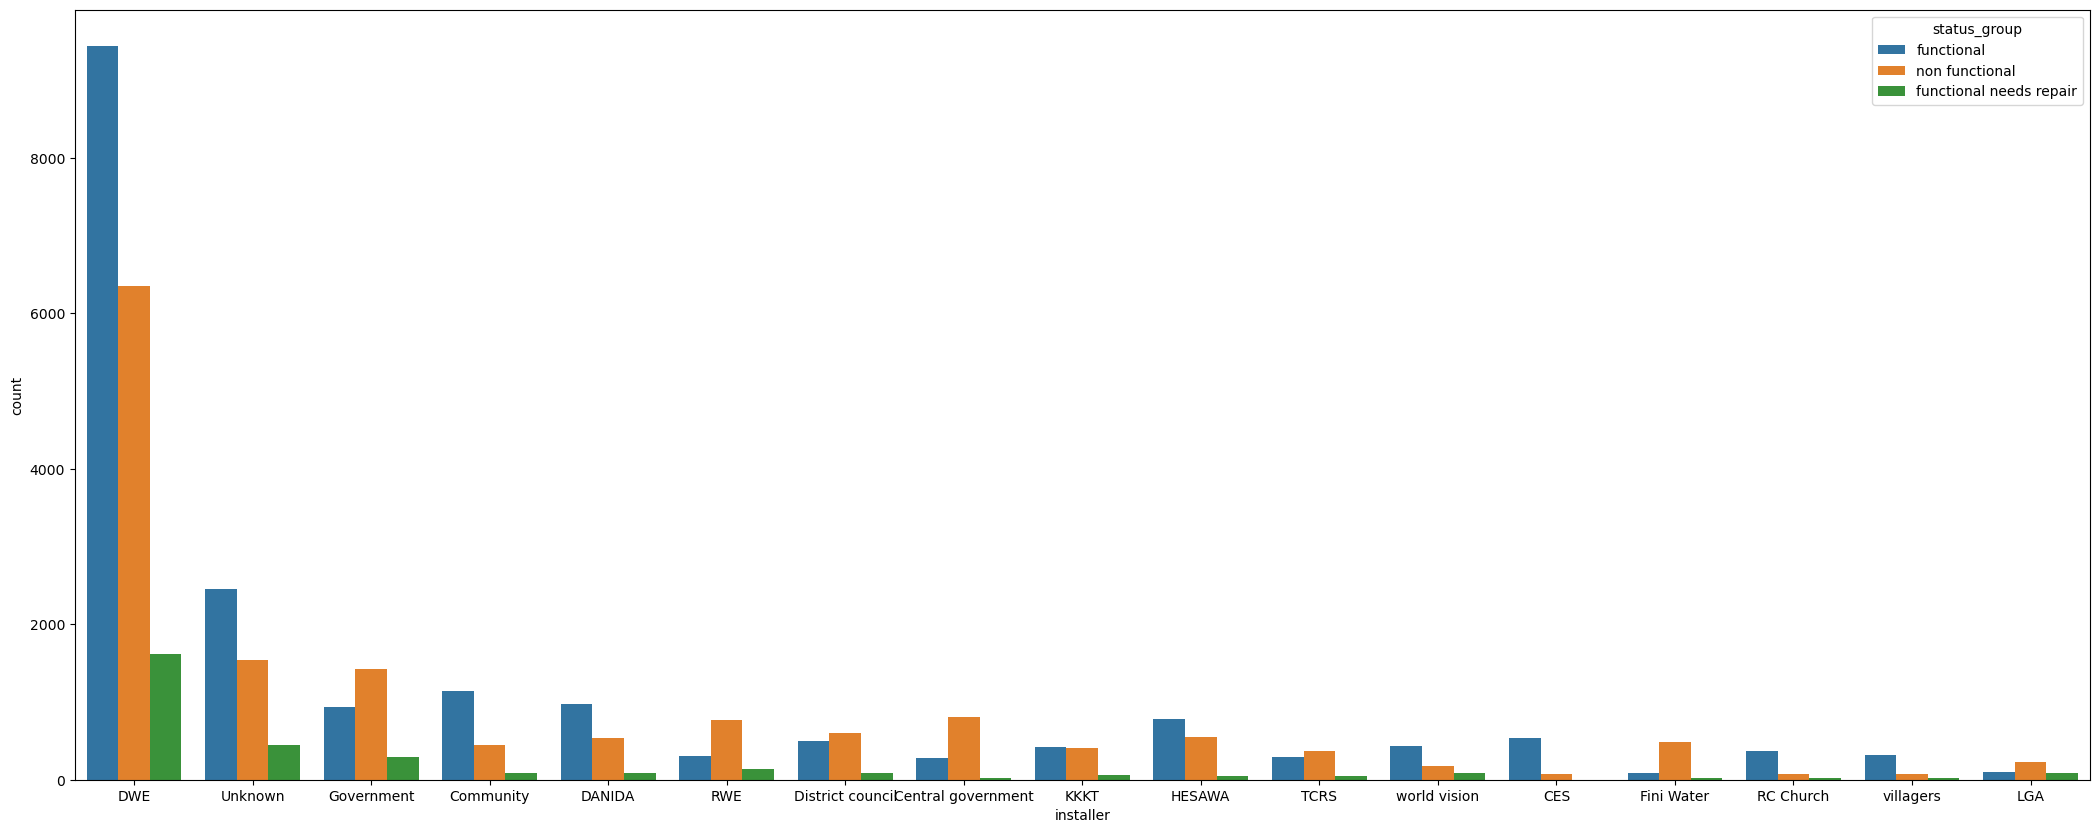

In [71]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

It is interesting that most of water points which central government and district council installed are non-functional. DWE has the majority of functional wells but has also many non-functional wells.

To ease our encoding later on, we will collect installers which has less than 400 value counts together and named them others.

In [72]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [74]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [75]:
df['installer_cat'].value_counts()

Others                22593
DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
Fini Water              593
RC Church               461
villagers               408
LGA                     408
Name: installer_cat, dtype: int64

Now, we have new feature as installer_cat with 17 unique values.

## funder column

In [76]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [77]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 20 values for future encoding.

In [78]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

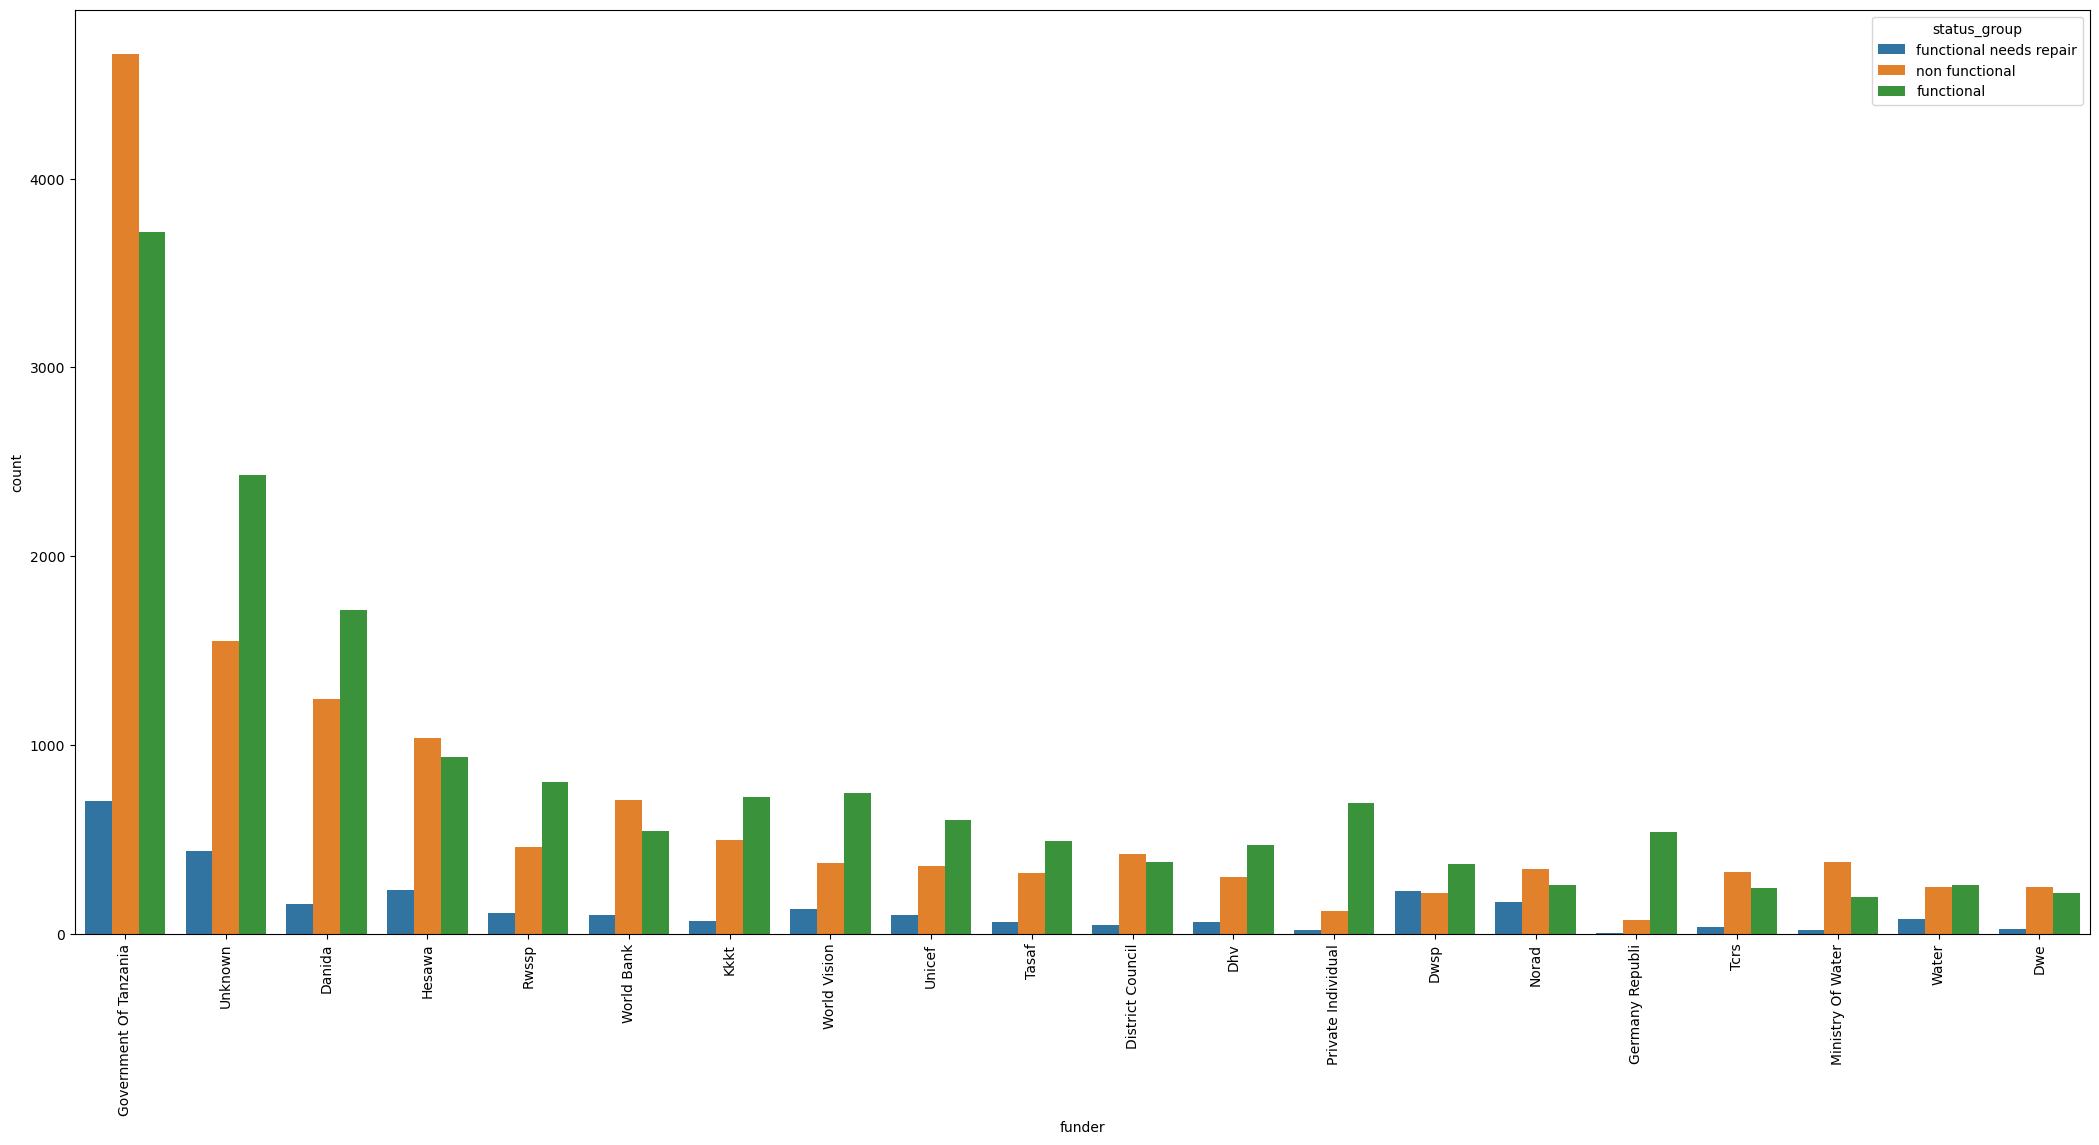

In [79]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot, we realize that most of the water points which funded by government are non-functional.

In [80]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [81]:
df['funder_cat'].nunique() # We have 21 unique values for this column

21

## longitude column

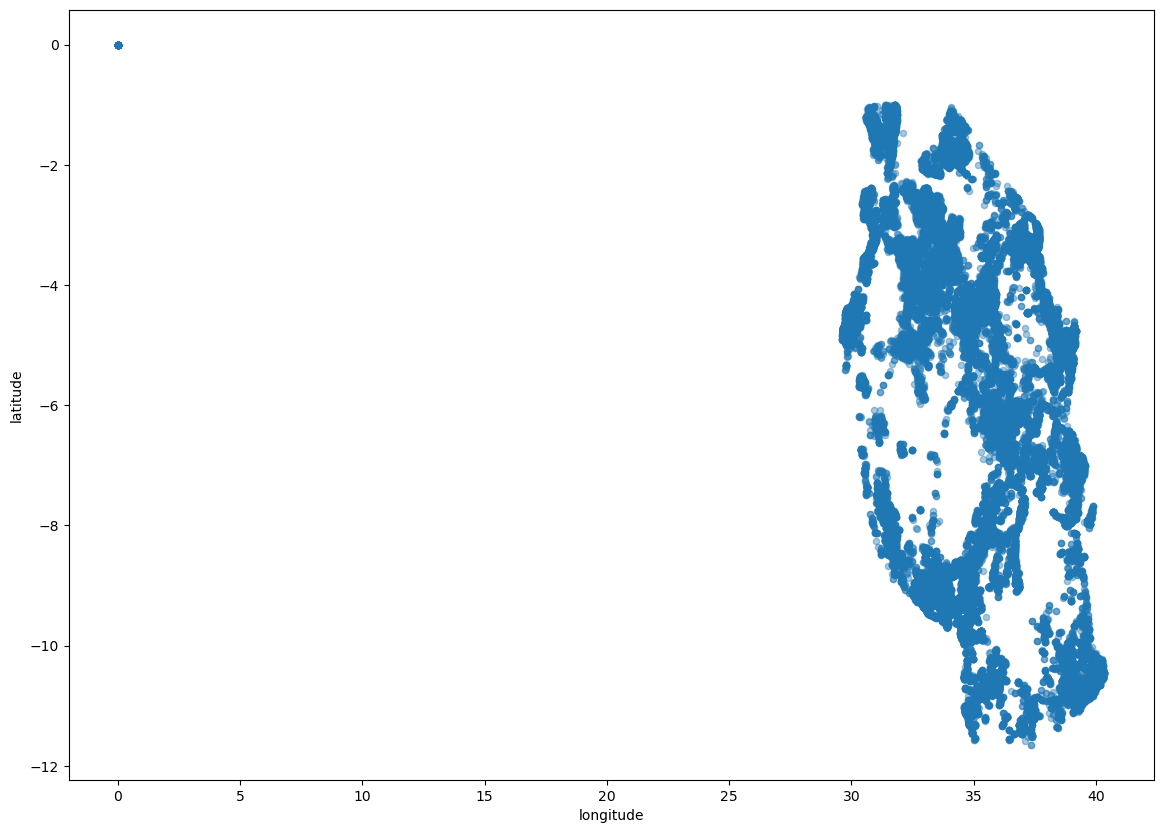

In [82]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [83]:
df.loc[df['longitude']==0] # to check outside of Tanzania

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,functional,0.0,2013/02/10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,...,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,non functional,0.0,2011/08/01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,...,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,functional,0.0,2013/01/30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,...,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,non functional,0.0,2013/01/17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,...,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,functional needs repair,0.0,2012/10/29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011/07/18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,...,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,functional,0.0,2013/01/22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,...,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,functional needs repair,0.0,2011/07/19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,...,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,functional,0.0,2013/01/22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,...,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


In [84]:
df.loc[df['longitude']!=0].describe() # to find the non-zero values mean

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


It is obviously seen that it is written as 0 when the longtitude is unknown. Because, the zero points can seen easily in the graph above outliers and outside of Tanzania. So, we changed them to mean where median is the almost same value.

In [85]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

## wpt_name / scheme_name / id/ region/ region_code columns

In [86]:
df['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

In [87]:
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

## Check for duplicate IDs

In [88]:
df.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [89]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

When we checked the wpt_name, scheme_name and id columns, they do not have any information about functionality. So, we decide to drop them. We dropped also region_code column because region column gives more information about the region. Also, before dropping columns we check the dublicated values in dataframe.

In [90]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

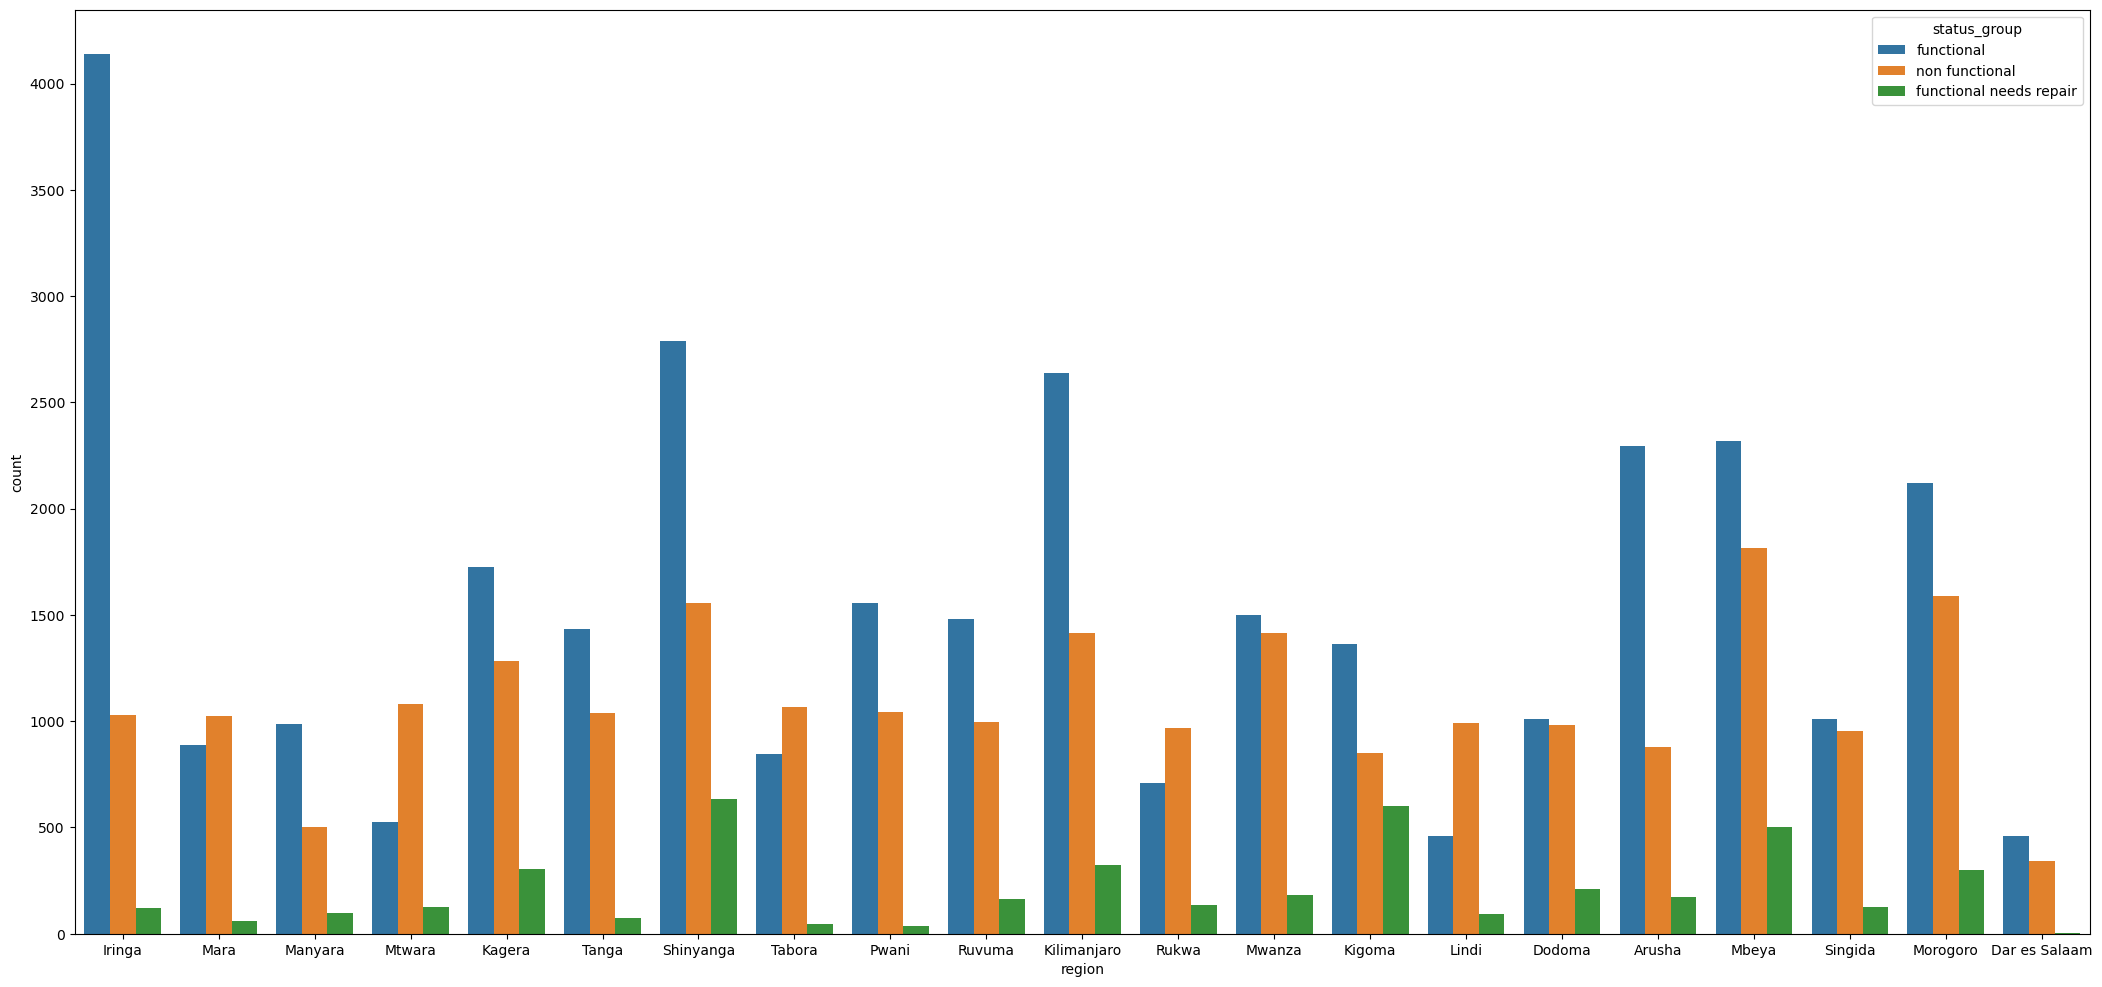

In [91]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

Some regions has higher probability of functional water well. Klimanjaro and Arusha have Pangani basin which has higher water point between basins. It is also seen that they have higher portions for functional wells.

In [92]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area

In [93]:
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality status_group                                                 
coloured      functional                        1              1       1   
              non functional                    1              1       1   
salty         functional                       19             19      19   
              non functional                    8              8       8   
soft          functional                     4120           4120    4120   
              functional needs repair         123            123     123   
              non functional                  983            983     983   
unknown       functional                        1              1       1   
              non functional                   38             38      38   

                                       gps_height  installer  longitude  \
water_quality status_group                                                
coloured      functional                        1          1          1   
              non functional                    1          1          1   
salty         functional                       19         19         19   
              non functional                    8          8          8   
soft          functional                     4120       4120       4120   
              functional needs repair         123        123        123   
              non functional                  983        983        983   
unknown       functional                        1          1          1   
              non functional                   38         38         38   

                                       latitude  num_private  basin  \
water_quality status_group                                            
coloured      functional                      1            1      1   
              non functional                  1            1      1   
salty         functional                     19           19     19   
              non functional                  8            8      8   
soft          functional                   4120         4120   4120   
              functional needs repair       123          123    123   
              non functional                983          983    983   
unknown       functional                      1            1      1   
              non functional                 38           38     38   

                                       subvillage  ...  construction_year  \
water_quality status_group                         ...                      
coloured      functional                        1  ...                  1   
              non functional                    1  ...                  1   
salty         functional                       19  ...                 19   
              non functional                    8  ...                  8   
soft          functional                     4120  ...               4120   
              functional needs repair         123  ...                123   
              non functional                  983  ...                983   
unknown       functional                        1  ...                  1   
              non functional                   38  ...                 38   

                                       extraction_type_group  management  \
water_quality status_group                                                 
coloured      functional                                   1           1   
              non functional                               1           1   
salty         functional                                  19          19   
              non functional                               8           8   
soft          functional                                4120        4120   
              functional needs repair                    123         123   
              non functional                             983         983   
unknown       functional                                   1  

When we looked at the Iringa area which has higher water points. There are also 983 wells which has soft, good water but non-functional.

In [94]:
df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [95]:
df_daressalaam.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality      status_group                                                 
fluoride abandoned non functional                    2              2       2   
milky              functional                        1              1       1   
                   non functional                    1              1       1   
salty              functional                       41             41      41   
                   non functional                  100            100     100   
salty abandoned    functional                       63             63      63   
                   non functional                   37             37      37   
soft               functional                      352            352     352   
                   functional needs repair           3              3       3   
                   non functional                  186            186     186   
unknown            functional                        4              4       4   
                   non functional                   15             15      15   

                                            gps_height  installer  longitude  \
water_quality      status_group                                                
fluoride abandoned non functional                    2          2          2   
milky              functional                        1          1          1   
                   non functional                    1          1          1   
salty              functional                       41         41         41   
                   non functional                  100        100        100   
salty abandoned    functional                       63         63         63   
                   non functional                   37         37         37   
soft               functional                      352        352        352   
                   functional needs repair           3          3          3   
                   non functional                  186        186        186   
unknown            functional                        4          4          4   
                   non functional                   15         15         15   

                                            latitude  num_private  basin  \
water_quality      status_group                                            
fluoride abandoned non functional                  2            2      2   
milky              functional                      1            1      1   
                   non functional                  1            1      1   
salty              functional                     41           41     41   
                   non functional                100          100    100   
salty abandoned    functional                     63           63     63   
                   non functional                 37           37     37   
soft               functional                    352          352    352   
                   functional needs repair         3            3      3   
                   non functional                186          186    186   
unknown            functional                      4            4      4   
                   non functional                 15           15     15   

                                            subvillage  ...  \
water_quality      status_group                         ...   
fluoride abandoned non functional                    2  ...   
milky              functional                        1  ...   
                   non functional                    1  ...   
salty              functional                       41  ...   
                   non functional                  100  ...   
salty abandoned    functional                       63  ...   
                   non functional                   37  ...   
soft               functional                      352  ...   
                   functional needs repair           3  ...   
                   non functio

It is very sad that Dar us Salaam is most populated area in Tanzania with its rural areas around, but water points are not enough. Even, 35% of the soft water wells are non-functional.

## amount_tsh column

In [96]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [97]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,...,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,...,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,...,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [98]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

We decided to drop this column because 70% of the column has no informative values. So, this column will not give idea to our model and we will drop it.

In [99]:
df.drop(columns=['amount_tsh'],inplace=True )

In [100]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [101]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

Gps height shows the level of the water point from sea level. There are 34% zero values but maybe 34% of the water points are at the sea level so we do not change this column now.

## population column

In [102]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [103]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


Some functional water points has zero population, it is weird so we will change zero population to mean.

In [104]:
df.loc[df['population']!=0].describe() # to see without zero mean and median

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [105]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [106]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.

## num_private column

This column has no information about it and also mostly have zero values. So, we drop this also.

In [107]:
df.drop(columns=['num_private'],inplace=True )

## basin column

In [108]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

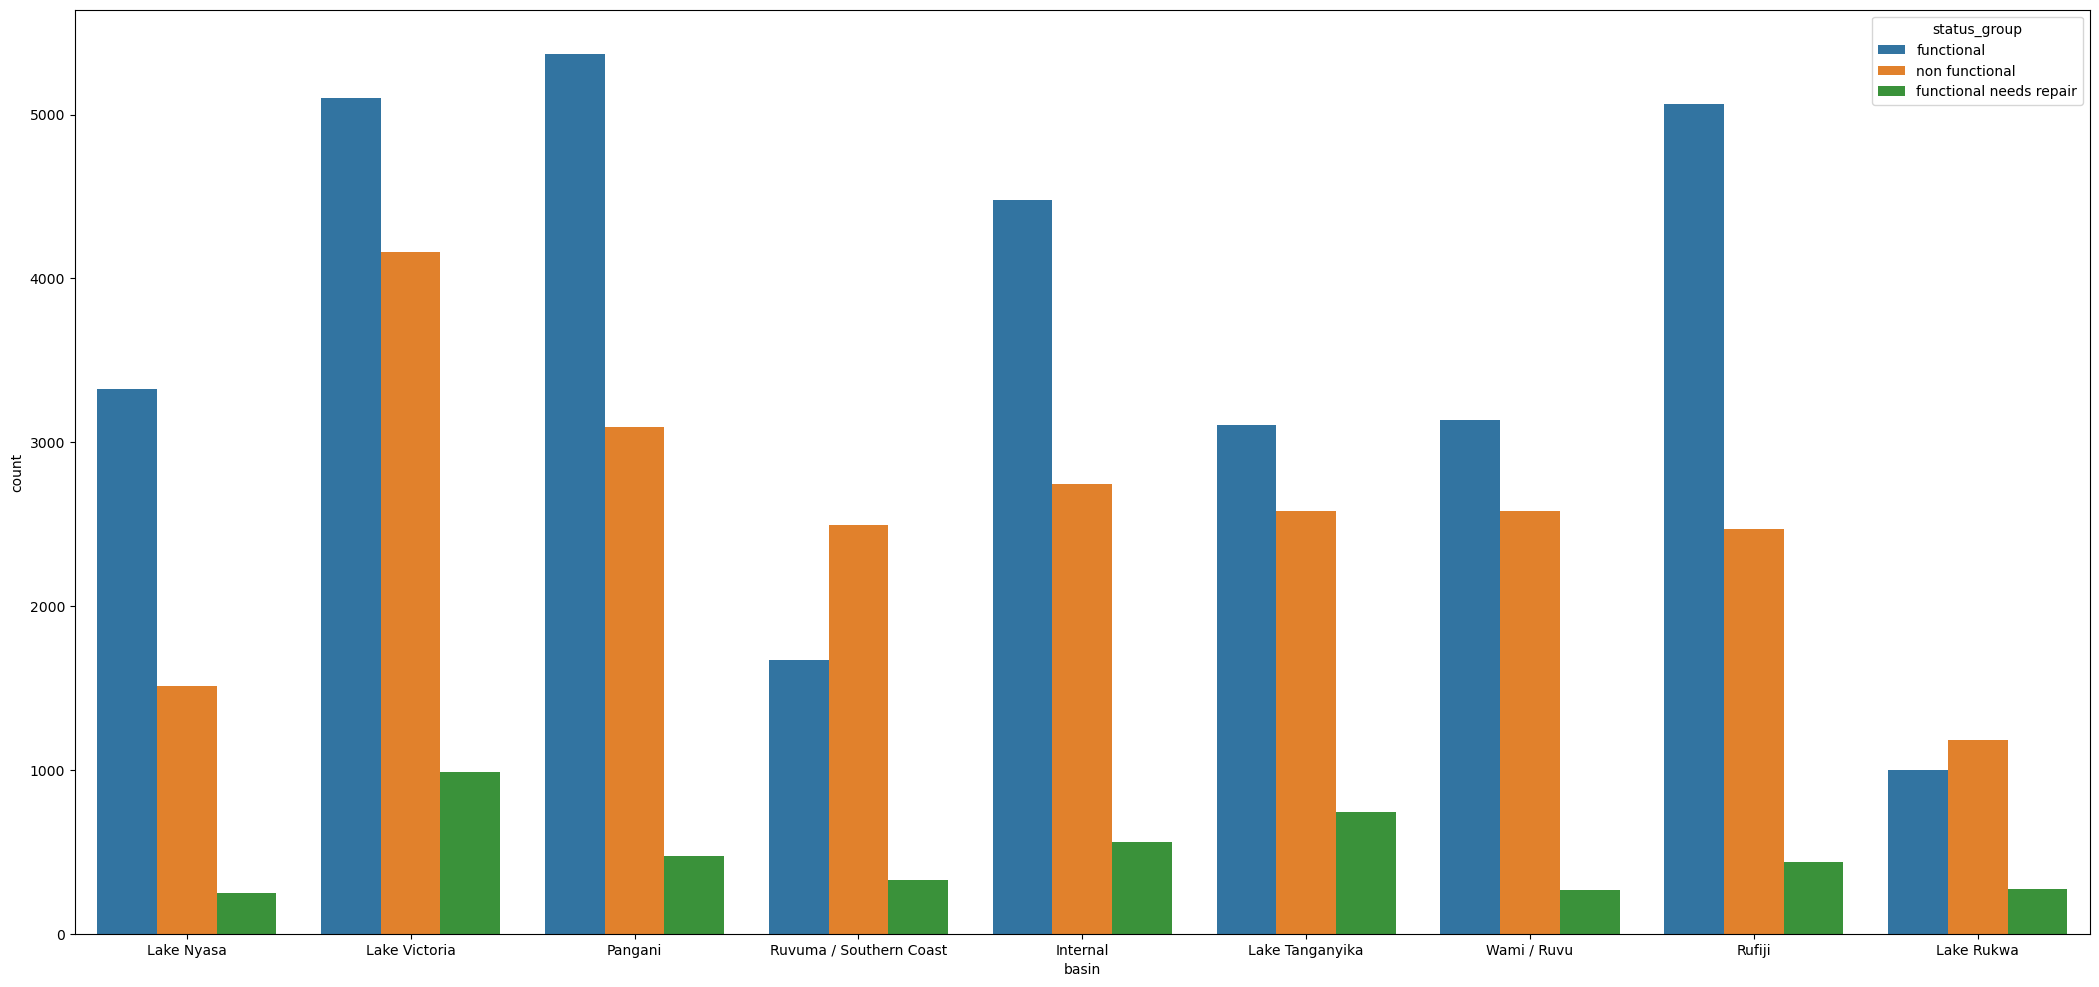

In [109]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

This column gives an idea about there is correlation between functionality and geographical water basin.

## subvillage column

In [110]:
df['subvillage'].nunique()

19287

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this nunique object values.

In [111]:
df.drop(columns=['subvillage'],inplace=True )

## district_code column

In [112]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

It includes numeric values about districts. Each district has one number.

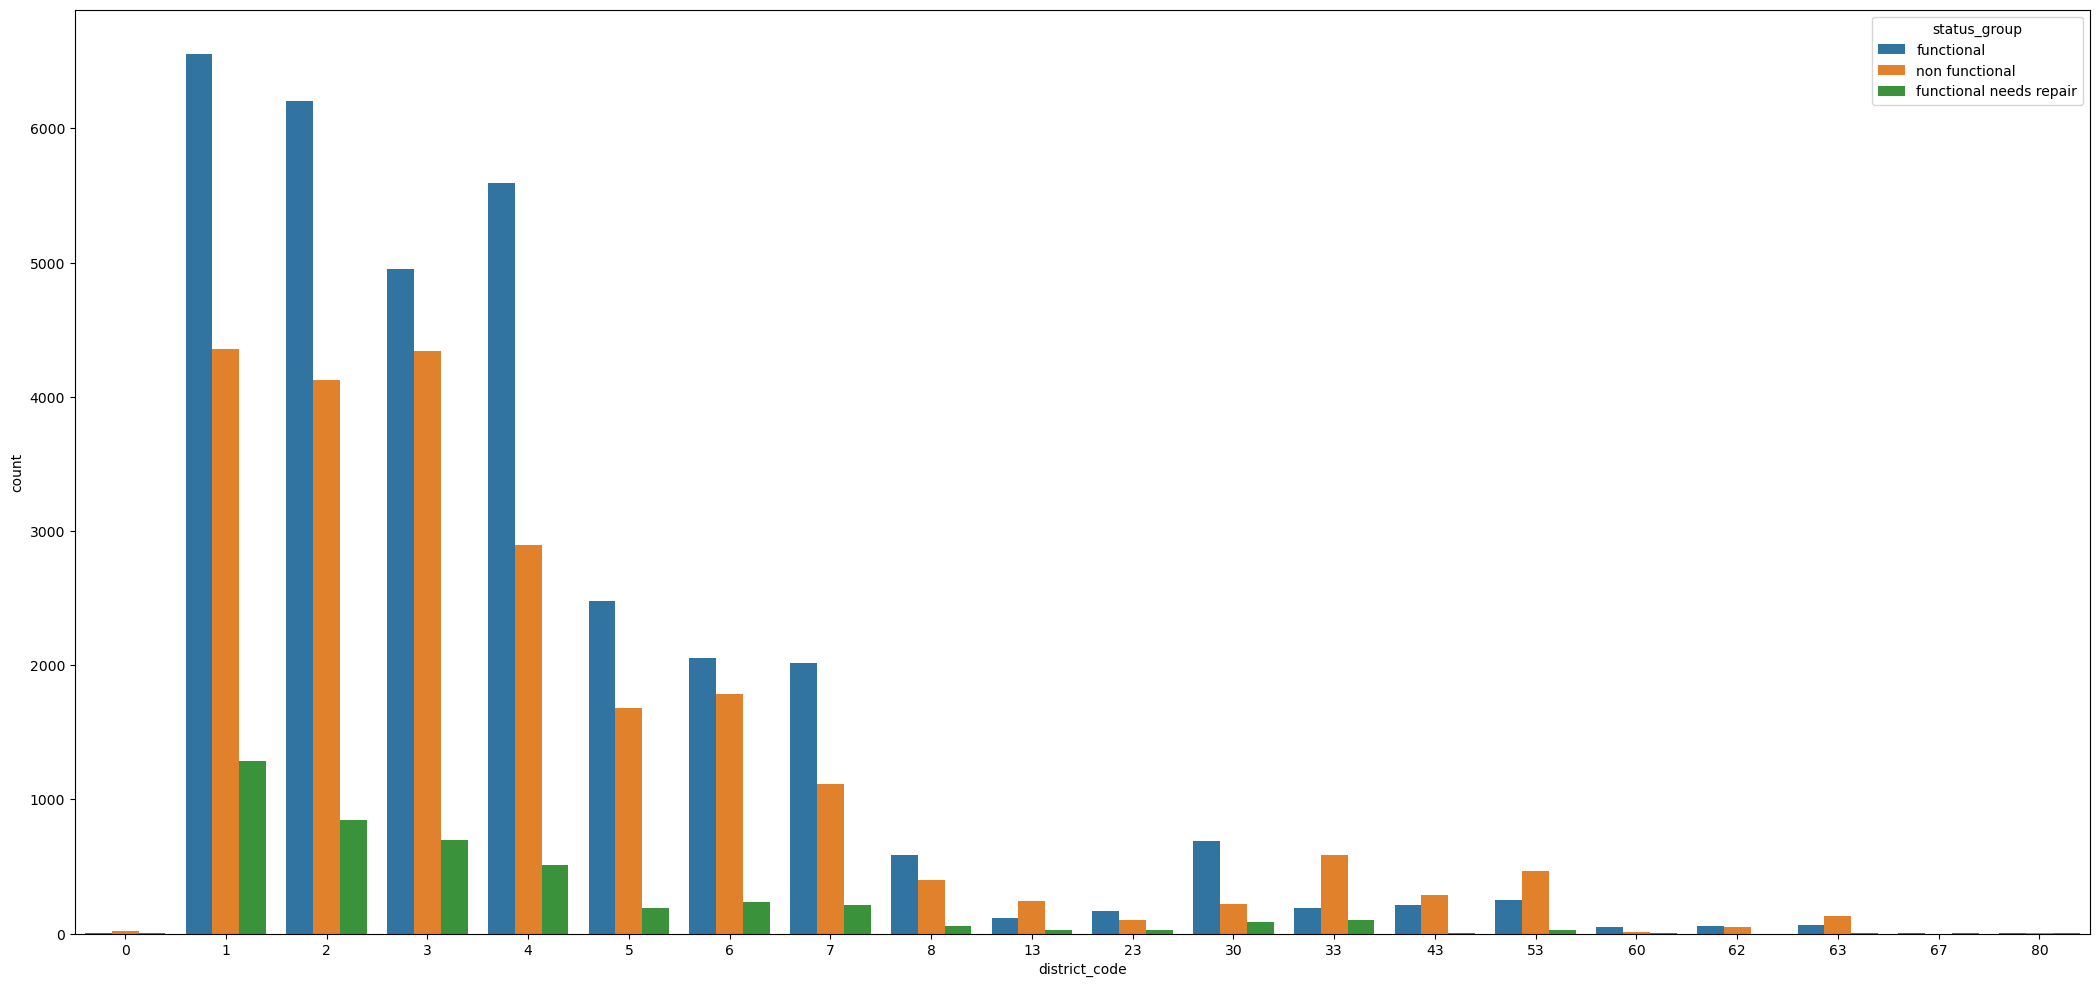

In [113]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=df)

Some districts has higher chance to have functional water points.

## lga / ward columns

Now we decided to keep these columns because they contain geographical location. But, we have also other location features so maybe they will be dropped later on.

## public_meeting column

In [115]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [116]:
df['public_meeting'].fillna(value=True,inplace=True)

There are some null values and we convert them to most common data.

## permit column

In [117]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

This column shows if the water point is permitted or not. There are 3056 null values for this column. We will change them to true which has higher amount.

In [118]:
df['permit'].fillna(value=True, inplace=True)

## Converting Target to Ternary Values

In [119]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [120]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

To make our model, we changed the target variable to 0,1 and 2 values.

And we create new csv file to keep our work and call new cleaned data.

In [121]:
df.to_csv('clean_data.csv')

In [122]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(50)

date_recorded  funder  \
quantity     water_quality      status_group                          
dry          coloured           1                         1       1   
                                2                        28      28   
             fluoride           2                         2       2   
             fluoride abandoned 2                         2       2   
             milky              2                       119     119   
             salty              0                        11      11   
                                1                         1       1   
                                2                       638     638   
             salty abandoned    0                         1       1   
                                2                        12      12   
             soft               0                       136     136   
                                1                        19      19   
                                2                      4272    4272   
             unknown            0                         9       9   
                                1                        16      16   
                                2                       979     979   
enough       coloured           0                       107     107   
                                1                        11      11   
                                2                        53      53   
             fluoride           0                        66      66   
                                1                         9       9   
                                2                         9       9   
             fluoride abandoned 0                         5       5   
                                2                         6       6   
             milky              0                       246     246   
                                1                         9       9   
                                2                        81      81   
             salty              0                      1373    1373   
                                1                        89      89   
                                2                       834     834   
             salty abandoned    0                       150     150   
                                1                        50      50   
                                2                        56      56   
             soft               0                     19640   19640   
                                1                      2226    2226   
                                2                      8035    8035   
             unknown            0                        61      61   
                                1                         6       6   
                                2                        64      64   
insufficient coloured           0                        91      91   
                                1                        13      13   
                                2                        66      66   
             fluoride           0                        85      85   
                                1                         4       4   
                                2                        25      25   
             fluoride abandoned 0                         1       1   
                                2                         3       3   
             milky              0                       118     118   
                                1                         4       4   
                                2                        91      91   

                                              gps_height  installer  \
quantity     water_quality      status_group                          
dry          coloured           1                      1          1   
                                2                     28         28   
             fluoride           2                      2          2  

## Feature Engineering

* There are lots of categorical values in funder and installer columns. We create new columns that if the value in the feature is not in first common 20 values, they were collected as 'others'. Also, there are lots of spelling mistakes in this columns which creates new unique values in these columns. We found top 100 common installer and fixed them. Then, builded new column which has categorized values.
* Construction years are in integer format but not continuous data or year values do not make sense for model. So, we divided them decades and assumed every decade as categorical value.